# Practice Lab: Neural Networks for Handwritten Digit Recognition, Multiclass 

In this exercise, you will use a neural network to recognize the hand-written digits 0-9.


# Outline
- [ 1 - Packages ](#1)
    - [ 2 - ReLU Activation](#2)
        - [ 3 - Softmax Function](#3)
            - [ Exercise 1](#ex01)
                - [ 4 - Neural Networks](#4)
                    - [ 4.1 Problem Statement](#4.1)
                        - [ 4.2 Dataset](#4.2)
                            - [ 4.3 Model representation](#4.3)
                                - [ 4.4 Tensorflow Model Implementation](#4.4)
                                    - [ 4.5 Softmax placement](#4.5)
                                        - [ Exercise 2](#ex02)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearningstyle.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<a name="2"></a>
## 2 - ReLU Activation
This week, a new activation was introduced, the Rectified Linear Unit (ReLU).
$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

In [3]:
##plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to to the resulting function without interfering. This is examined more in the supporting optional lab. 

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
The example from the lecture on the right shows an application of the ReLU. In this example, the derived "awareness" feature is not binary but has a continuous range of values. The sigmoid is best for on/off or binary situations. The ReLU provides a continuous linear relationship. Additionally it has an 'off' range where the output is zero.     
The "off" feature makes the ReLU a Non-Linear activation. Why is this needed? This enables multiple units to contribute to to the resulting function without interfering. This is examined more in the supporting optional lab. 

<a name="3"></a>
## 3 - Softmax Function
A multiclass neural network generates N outputs. One output is selected as the predicted answer. In the output layer, a vector $\mathbf{z}$ is generated by a linear function which is fed into a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will sum to 1. They can be interpreted as probabilities. The larger inputs to the softmax will correspond to larger output probabilities.
<center>  <img  src="./images/C2_W2_NNSoftmax.PNG" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

<a name="ex01"></a>
### Exercise 1
Let's create a NumPy implementation:

In [4]:
# UNQ_C1
# GRADED CELL: my_softmax

def my_softmax(z):
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """

    ez = np.exp(z)
    a = ez/np.sum(ez)

    return a

In [5]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")


my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


### Below vary the values of the z inputs

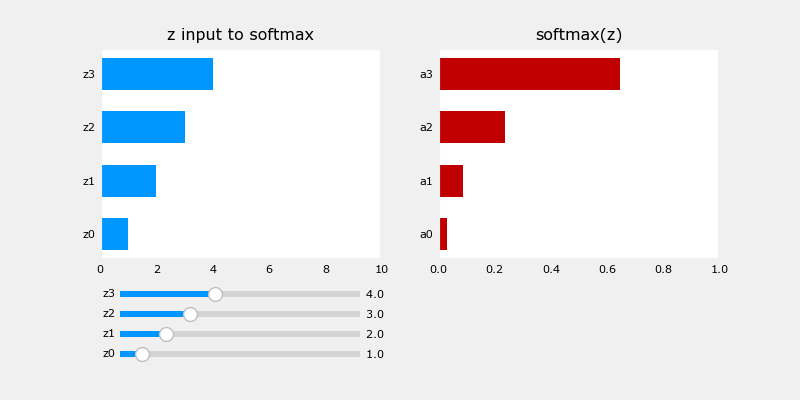

In [6]:
plt.close('all')
plt_softmax(my_softmax)

## 4.Neural Networks

In [7]:
#Load dataset
X,y=load_data()

In [8]:
print('The first element of X is: ',X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0